In [845]:
import pandas as pd, numpy as np

In [846]:
df=pd.read_csv("/kaggle/input/titanic/train.csv") 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [847]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [848]:
# her sütunun en çok tekrar eden değeri yazdırdık yani modunu bulduk. iloc kullandık cunku mode en cok tekrar edenlerı ılk satıra toplamıs.
modes = df.mode().iloc[0]
df1=pd.DataFrame(modes)
df1

,0
PassengerId,1
Survived,0.0
Pclass,3.0
Name,"Abbing, Mr. Anthony"
Sex,male
Age,24.0
SibSp,0.0
Parch,0.0
Ticket,1601
Fare,8.05


In [849]:
# her sütunun en çok tekrar eden değeri yazdırdık yani modunu bulduk. iloc kullandık cunku mode en cok tekrar edenlerı ılk satıra toplamıs.
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [850]:
j1=[n for n in df.columns]
j2=[]
for m in range(len(modes)):
    j2.append(modes[m])
j3=pd.DataFrame(j1,columns=["column"])
j4=pd.DataFrame(j2,columns=["mod"])
dff=pd.concat([j3,j4],axis=1)
dff

/tmp/ipykernel_47/2174289697.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  j2.append(modes[m])


,column,mod
0,PassengerId,1
1,Survived,0.0
2,Pclass,3.0
3,Name,"Abbing, Mr. Anthony"
4,Sex,male
5,Age,24.0
6,SibSp,0.0
7,Parch,0.0
8,Ticket,1601
9,Fare,8.05


**boş değerleri mod değerleri ile doldurmuş oldum. görüldüğü üzere yeni df datamızda boş değer yok.
**

In [851]:
i=0
for c in dff.column:
    df[c].fillna(dff["mod"][i],inplace=True)
    i+=1
    
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [852]:
#yukarda yaptıklarımı yapmadan da bu şekilde kısaca yapabilirsiniz ama kendimi geliştirmek için öyle yaptım
#df.fillna(modes,inplace=True)
#df.isna().sum()

**burda object sectıgım ıcın kategorık degıskenlerde gosterilir.
**

In [853]:
print(df.describe(include=[object]).T)

         count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      891    147                  B96 B98  691
Embarked   891      3                        S  646


**sadece numeric degerler gosterılır**

In [854]:
df.describe(include=(np.number)).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,28.566970,13.199572,0.42,22.0000,24.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**her ne kadar odenen para(Fare) ortalaması 32 olsada ortalama degerlerden bazen uzak degerler olabılrı burda mesela 
cok az deger 200-300 arasın da ıken dıgerlerı 0-100 arasında toplanmıs.
**

<Axes: >

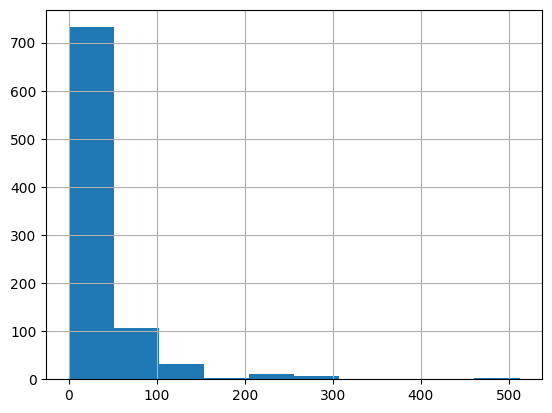

In [855]:
df["Fare"].hist()

**aykırı degerlerden kurtulmak ıcın logarıtmık yontemı kullandık.**

<Axes: >

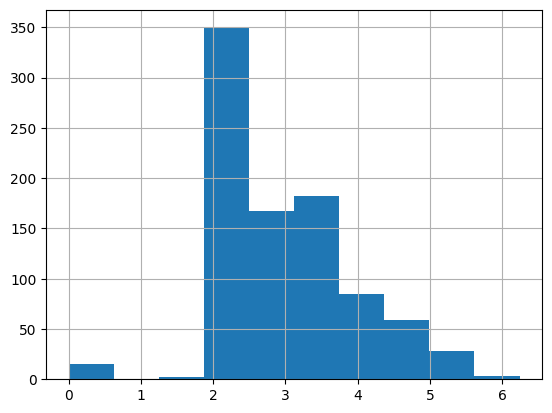

In [856]:
df["Fare"]=np.log(df["Fare"]+1)
df["Fare"].hist()

kategorik değişkenleri numerik yaptık

In [857]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"],dtype=int)
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [858]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


**bagımlı degıskenlerımızı tensore atalım**

In [859]:
import torch
from torch import tensor

t_dep = tensor(df.Survived)
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

**bagımsız degıskenlerımızı tensore atalım**

In [860]:
indep_cols = ['Age', 'SibSp', 'Parch', 'Fare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

**bagımsız degısken tensorlerımızın seklıne bakalım ve 12 tane sutunlu oldugundan demekkı bunlarla carpılacak katsayıların sayısıda 12 tane olmalıdır.**

In [861]:
t_indep.shape

torch.Size([891, 12])

**gradient baslangıcı ıcın bır tamamen rasgele 12 tane elemandan olusan bır vektor yaptık**

In [862]:
random_numbers_01 = torch.rand(12)
katsayilar = (random_numbers_01 - 0.5) 
katsayilar

tensor([ 0.1722,  0.2324, -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866,
        -0.0534,  0.3132, -0.1487, -0.2551])

**bu sekılde pytorch ıle bır normlızasyon yaptık cunku Age bır aykırı deger olarak davranıyordu.**

In [863]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

**katsayılarımı bagımsız degıskenler ıle dolu tensorumuzle carpalım
**

In [864]:
katsayilar*t_indep

tensor([[ 0.0473,  0.0291, -0.0000,  ...,  0.0000, -0.0000, -0.2551],
        [ 0.0818,  0.0291, -0.0000,  ...,  0.3132, -0.0000, -0.0000],
        [ 0.0560,  0.0000, -0.0000,  ...,  0.0000, -0.0000, -0.2551],
        ...,
        [ 0.0517,  0.0291, -0.1192,  ...,  0.0000, -0.0000, -0.2551],
        [ 0.0560,  0.0000, -0.0000,  ...,  0.3132, -0.0000, -0.0000],
        [ 0.0689,  0.0000, -0.0000,  ...,  0.0000, -0.1487, -0.0000]])

**sum() burada carpım sonucu olan tensordekı her satırı tek tek toplar ve bu bızım ıcın 891 tane tahmın degerı olur.**

In [865]:
def cal_preds(katsayilar,t_indep):
    preds = (t_indep*katsayilar).sum(axis=1)
    return preds

In [866]:
def fx(katsayilar, t_indep):
    preds = (t_indep*katsayilar).sum(axis=1)
    return preds

In [867]:
preds=fx(katsayilar, t_indep,)
preds

tensor([-0.4157,  0.2312, -0.4939, -0.3435, -0.4168, -0.3341, -0.2739, -0.4603,
        -0.6110,  0.2174, -0.5719, -0.3230, -0.4490, -0.6772, -0.5197, -0.2916,
        -0.3250, -0.3005, -0.4542,  0.0701, -0.2769, -0.2790, -0.4113, -0.3298,
        -0.5052, -0.7371,  0.1279, -0.3815, -0.3919, -0.4404,  0.2644,  0.2010,
        -0.3919, -0.2101,  0.2675, -0.2706,  0.1279, -0.4469, -0.4531,  0.0776,
        -0.4348, -0.3229,  0.1279,  0.0745, -0.4026, -0.4404, -0.3051, -0.3919,
         0.1858, -0.4822, -0.4206, -0.4469,  0.2549, -0.3186,  0.2585, -0.3384,
        -0.3647,  0.1376, -0.4894, -0.4426,  0.1236, -0.3662, -0.2643, -0.5157,
         0.2300,  0.0972, -0.3475, -0.4512, -0.5162, -0.3780, -0.2833, -0.4896,
        -0.3072,  0.1611, -0.4235, -0.4383, -0.4404, -0.4404, -0.4697, -0.4854,
        -0.4447, -0.4297, -0.3919, -0.3298, -0.3733, -0.3918, -0.6076, -0.4404,
        -0.4306, -0.4404, -0.4297, -0.4490, -0.2621, -0.5264, -0.3651, -0.4404,
         0.3311,  0.1681, -0.3965, -0.25

In [868]:
def cal_loss(katsayilar, t_indep):
    preds=fx(katsayilar, t_indep)
    return torch.abs(t_dep-preds).mean()

In [869]:
katsayilar.requires_grad_()

tensor([ 0.1722,  0.2324, -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866,
        -0.0534,  0.3132, -0.1487, -0.2551], requires_grad=True)

In [870]:
loss=cal_loss(katsayilar, t_indep)
loss

tensor(0.7024, grad_fn=<MeanBackward0>)

In [871]:
loss.backward()

In [872]:
katsayilar.grad

tensor([-0.2939, -0.0600, -0.0576, -0.3946, -0.4994, -0.3367, -0.1841, -0.1886,
        -0.4635, -0.0247, -0.0864, -0.7250])

In [873]:
loss = cal_loss(katsayilar, t_indep)
loss.backward()
katsayilar.grad

tensor([-0.5879, -0.1201, -0.1152, -0.7893, -0.9989, -0.6734, -0.3681, -0.3771,
        -0.9270, -0.0494, -0.1728, -1.4501])

In [874]:
loss = cal_loss(katsayilar, t_indep)
loss.backward()
with torch.no_grad():
    katsayilar.sub_(katsayilar.grad * 0.1)
    katsayilar.grad.zero_()
    print(cal_loss(katsayilar, t_indep))

tensor(0.4353)


In [875]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

**trn_split ve val_split rasgele bir index listesi dondurur.**

In [876]:
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [877]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(trn_indep),trn_indep,val_indep

(713,
 713,
 tensor([[0.0125, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
         [0.5063, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.3375, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
         ...,
         [0.3000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.2125, 0.1250, 0.1667,  ..., 1.0000, 0.0000, 0.0000],
         [0.4500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]]),
 tensor([[0.3000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.3000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.3000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         ...,
         [0.4500, 0.0000, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
         [0.3000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
         [0.1125, 0.1250, 0.1667,  ..., 0.0000, 0.0000, 1.0000]]))

sub_  iki tensoru birbirinden çıkarmaya çalışır.

In [878]:
def update_coeffs(katsayilar, lr):
    katsayilar.sub_(katsayilar.grad * lr)
    katsayilar.grad.zero_()

In [879]:
def one_epoch(katsayilar, lr):
    loss = cal_loss(katsayilar, t_indep)
    loss.backward()
    with torch.no_grad(): update_coeffs(katsayilar, lr)
    print(f"loss: {loss:.3f}", end="; ")

In [880]:
n_coeff = t_indep.shape[1]

In [881]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [882]:
def train_model(epochs=200, lr=0.05):
    torch.manual_seed(442)
    katsayilar = init_coeffs()
    for i in range(epochs): one_epoch(katsayilar, lr=lr)
    return katsayilar

In [883]:
loss = train_model(200, lr=0.05)

loss: 0.538; loss: 0.529; loss: 0.520; loss: 0.512; loss: 0.505; loss: 0.498; loss: 0.491; loss: 0.485; loss: 0.479; loss: 0.473; loss: 0.467; loss: 0.461; loss: 0.455; loss: 0.450; loss: 0.444; loss: 0.438; loss: 0.433; loss: 0.427; loss: 0.422; loss: 0.416; loss: 0.411; loss: 0.405; loss: 0.400; loss: 0.394; loss: 0.389; loss: 0.384; loss: 0.379; loss: 0.373; loss: 0.368; loss: 0.363; loss: 0.359; loss: 0.354; loss: 0.350; loss: 0.346; loss: 0.343; loss: 0.339; loss: 0.336; loss: 0.333; loss: 0.330; loss: 0.326; loss: 0.323; loss: 0.321; loss: 0.318; loss: 0.315; loss: 0.313; loss: 0.310; loss: 0.308; loss: 0.306; loss: 0.303; loss: 0.301; loss: 0.300; loss: 0.298; loss: 0.296; loss: 0.294; loss: 0.293; loss: 0.291; loss: 0.290; loss: 0.288; loss: 0.287; loss: 0.285; loss: 0.284; loss: 0.282; loss: 0.281; loss: 0.280; loss: 0.279; loss: 0.277; loss: 0.276; loss: 0.274; loss: 0.273; loss: 0.272; loss: 0.271; loss: 0.269; loss: 0.268; loss: 0.267; loss: 0.266; loss: 0.265; loss: 0.264;

In [884]:
def show_coeffs(): return dict(zip(indep_cols, katsayilar.requires_grad_(False)))
show_coeffs()

{'Age': tensor(0.2603),
 'SibSp': tensor(0.2504),
 'Parch': tensor(-0.3402),
 'Fare': tensor(0.1174),
 'Sex_male': tensor(-0.0335),
 'Sex_female': tensor(-0.1401),
 'Pclass_1': tensor(0.1041),
 'Pclass_2': tensor(0.1432),
 'Pclass_3': tensor(0.0857),
 'Embarked_C': tensor(0.3206),
 'Embarked_Q': tensor(-0.1228),
 'Embarked_S': tensor(-0.0376)}

In [885]:
preds = cal_preds(katsayilar, val_indep)
preds

tensor([ 0.0071,  0.0483,  0.4906,  0.2118,  0.2032,  0.2723,  0.2728,  0.1063,
         0.1338,  0.3782,  0.1600,  0.4780,  0.0492, -0.0580,  0.1632,  0.2419,
         0.3070,  0.0522,  0.2611,  0.0517,  0.1339,  0.2777,  0.4750,  0.1185,
         0.1190,  0.0995, -0.0671,  0.2972,  0.1127, -0.0583, -0.0396,  0.0760,
         0.1176,  0.1554,  0.0267, -0.0083,  0.2529,  0.4428,  0.1342,  0.0619,
         0.1799,  0.1342,  0.1395,  0.4706,  0.1212, -0.1723,  0.1755,  0.1847,
         0.0465,  0.0193,  0.2385,  0.1599,  0.1212,  0.1353,  0.2027,  0.2222,
         0.0483,  0.2159,  0.1244,  0.1608,  0.5521,  0.1405,  0.3580,  0.1242,
         0.2020,  0.1268,  0.1999,  0.2023,  0.0869,  0.1623,  0.1404,  0.2834,
         0.2190,  0.1370,  0.1731,  0.1076,  0.1342,  0.2729,  0.1836,  0.2773,
         0.1507,  0.4071,  0.1306,  0.1325,  0.1742,  0.5002,  0.5696, -0.0198,
         0.5067,  0.1966,  0.1609,  0.1342,  0.4703,  0.5101,  0.3312,  0.5970,
         0.2839,  0.0235, -0.0648,  0.02

In [886]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([False,  True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False, False,  True, False])

In [887]:
results.float().mean()

tensor(0.5899)

In [888]:
def acc(katsayilar): return (val_dep.bool()==(cal_preds(katsayilar, val_indep)>0.5)).float().mean()
acc(katsayilar)

tensor(0.5899)

**baktığımız zaman tahminlerimiz de negatif değerler var. işte bu değerlerin hepsini 0-1 arasına sıkıştırmak için kullanıyoruz sigmoidi.**

In [889]:
preds

tensor([ 0.0071,  0.0483,  0.4906,  0.2118,  0.2032,  0.2723,  0.2728,  0.1063,
         0.1338,  0.3782,  0.1600,  0.4780,  0.0492, -0.0580,  0.1632,  0.2419,
         0.3070,  0.0522,  0.2611,  0.0517,  0.1339,  0.2777,  0.4750,  0.1185,
         0.1190,  0.0995, -0.0671,  0.2972,  0.1127, -0.0583, -0.0396,  0.0760,
         0.1176,  0.1554,  0.0267, -0.0083,  0.2529,  0.4428,  0.1342,  0.0619,
         0.1799,  0.1342,  0.1395,  0.4706,  0.1212, -0.1723,  0.1755,  0.1847,
         0.0465,  0.0193,  0.2385,  0.1599,  0.1212,  0.1353,  0.2027,  0.2222,
         0.0483,  0.2159,  0.1244,  0.1608,  0.5521,  0.1405,  0.3580,  0.1242,
         0.2020,  0.1268,  0.1999,  0.2023,  0.0869,  0.1623,  0.1404,  0.2834,
         0.2190,  0.1370,  0.1731,  0.1076,  0.1342,  0.2729,  0.1836,  0.2773,
         0.1507,  0.4071,  0.1306,  0.1325,  0.1742,  0.5002,  0.5696, -0.0198,
         0.5067,  0.1966,  0.1609,  0.1342,  0.4703,  0.5101,  0.3312,  0.5970,
         0.2839,  0.0235, -0.0648,  0.02

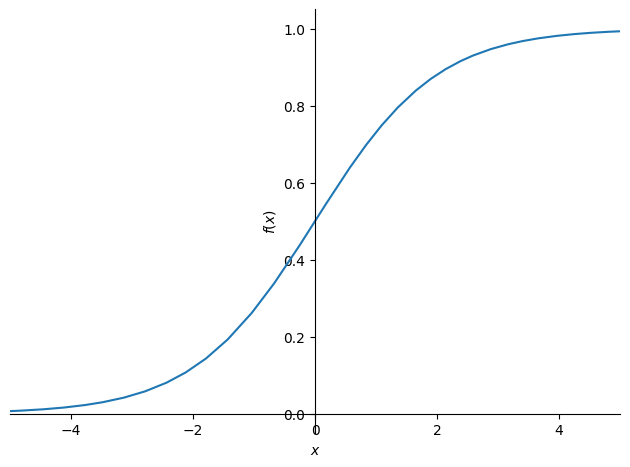

In [890]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

pytorchda sigmoid uygulanması.

In [891]:
def cal_preds(katsayilar, indeps): return torch.sigmoid((indeps*katsayilar).sum(axis=1))

In [892]:
coeffs = train_model(100,1)

loss: 0.538; loss: 0.585; loss: 1.005; loss: 0.649; loss: 1.159; loss: 0.697; loss: 1.152; loss: 0.710; loss: 1.160; loss: 0.717; loss: 1.152; loss: 0.725; loss: 1.144; loss: 0.728; loss: 1.141; loss: 0.739; loss: 1.130; loss: 0.742; loss: 1.129; loss: 0.750; loss: 1.121; loss: 0.756; loss: 1.116; loss: 0.764; loss: 1.108; loss: 0.767; loss: 1.104; loss: 0.775; loss: 1.096; loss: 0.778; loss: 1.093; loss: 0.786; loss: 1.085; loss: 0.792; loss: 1.079; loss: 0.797; loss: 1.073; loss: 0.805; loss: 1.065; loss: 0.809; loss: 1.066; loss: 0.813; loss: 1.062; loss: 0.816; loss: 1.058; loss: 0.818; loss: 1.057; loss: 0.822; loss: 1.053; loss: 0.826; loss: 1.049; loss: 0.821; loss: 1.054; loss: 0.825; loss: 1.050; loss: 0.829; loss: 1.046; loss: 0.833; loss: 1.042; loss: 0.837; loss: 1.038; loss: 0.841; loss: 1.034; loss: 0.842; loss: 1.032; loss: 0.846; loss: 1.029; loss: 0.848; loss: 1.027; loss: 0.851; loss: 1.023; loss: 0.847; loss: 1.028; loss: 0.851; loss: 1.024; loss: 0.855; loss: 1.024;

In [893]:
acc(katsayilar)

tensor(0.3876)

In [894]:
show_coeffs()

{'Age': tensor(0.2603),
 'SibSp': tensor(0.2504),
 'Parch': tensor(-0.3402),
 'Fare': tensor(0.1174),
 'Sex_male': tensor(-0.0335),
 'Sex_female': tensor(-0.1401),
 'Pclass_1': tensor(0.1041),
 'Pclass_2': tensor(0.1432),
 'Pclass_3': tensor(0.0857),
 'Embarked_C': tensor(0.3206),
 'Embarked_Q': tensor(-0.1228),
 'Embarked_S': tensor(-0.0376)}

In [895]:
tst_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [896]:
tst_df['Fare'] = tst_df.Fare.fillna(0)